**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = os.getcwd()

In [3]:
file = os.path.join(path,'data','step3_output.csv')

In [4]:
df = pd.read_csv(file)

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

<p style="color:purple; font-weight: bold;"> Note from Cassie: In step 5, I indicated that I would use Model 3. I chose this model because it did not include state or elevation data. However, when I used Model 3 for this step, my final answer was around 77. This doesn't make sense as the current AdultWeekend price is 81. Decreasing the ticket price by 4 dollars is not going to increase sales. Since I noticed that the explained variance and mean absolute error values were better for Model 2, I decided to try that model instead. I got an answer of 87.66, which makes a lot more sense, so I went with Model 2 for this step. </p> 

In [5]:
df=df.drop(columns=['state','Unnamed: 0'], axis=1)

In [6]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

X = df.drop(['Name','AdultWeekend'], axis=1)

y = df['AdultWeekend'] 
 
scaler = preprocessing.StandardScaler().fit(X)

X_scaled=scaler.transform(X)

In [7]:
from sklearn.model_selection import train_test_split

y = y.ravel()

X_train,X_test, y_train,y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [8]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [9]:
print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(lm.intercept_)

0.5325426531233336
7.373969726141045
56.35202406990897


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

<p style="color:purple; font-weight: bold;">Note from Cassie: The Big Mountain Resort row did not exist in my step 3 output. This row seems to have been deleted when I removed all the outliers in step 3.   With a little investigating, I noticed that multiple values are outliers in this row. For example, the NightSkiing_ac column of the dataframe has a Q3 of 83.75 acres. However, the value for Big Mountain is 600, which is far beyond the IQR.  </p>

<p style="color:purple; font-weight: bold;"> In order to complete the rest of the notebook, I went back to step 3 and appended the Big Mountain resort row to the IQR dataframe. I did this so that the clusters column would be added to the Big Mountain record (since the clusters are important later in this step). </p>

In [10]:
step3a = os.path.join(path,'data','step3_append_output.csv')
df2 = pd.read_csv(step3a)

In [11]:
bigm = df2[df2['Name'].str.contains('Big Mountain')].drop(columns=['state','Unnamed: 0'], axis=1)

In [12]:
bigm

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
176,Big Mountain Resort,6817,2353,0,0.0,0,3,2,6,0,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,0


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [13]:
X2 = bigm.drop(['Name','AdultWeekend'], axis=1)
y2 = bigm['AdultWeekend']
scaler2 = preprocessing.StandardScaler().fit(X2)
X_scaled2=scaler.transform(X2) 
y2 = y2.ravel()

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [14]:
weekend_predict = model.predict(X_scaled2)
print(weekend_predict)

[87.6619313]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [15]:
print(bigm['AdultWeekend'])

176    81.0
Name: AdultWeekend, dtype: float64


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

<p style="color:purple; font-weight: bold;">I decided to make plots based on the highlights of the resort. I noticed that Big Mountain Resort (BMR) tends to offer more than most of the other resorts. BMR has more runs, a greater vertical drop, and has far more skiable terrain. There are multiple resorts that have far less and charge either the same or even more. These plots are a good way to show that the people are getting their money's worth, even with the increase in ticket prices. </p>

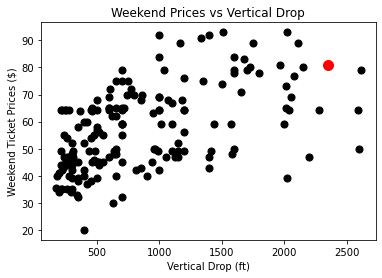

In [16]:
plt.scatter(df['vertical_drop'], df['AdultWeekend'], c='black', s=50)
plt.scatter(bigm['vertical_drop'], bigm['AdultWeekend'], c='red', s=100)
plt.xlabel('Vertical Drop (ft)')
plt.ylabel('Weekend Ticket Prices ($)')
plt.title('Weekend Prices vs Vertical Drop')
plt.savefig('figures/fig1.png',bbox_inches='tight')

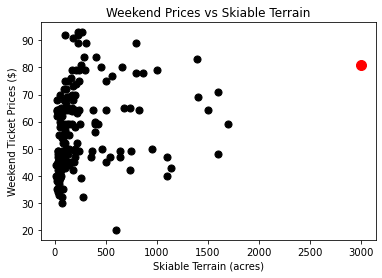

In [17]:
plt.scatter(df['SkiableTerrain_ac'], df['AdultWeekend'], c='black', s=50)
plt.scatter(bigm['SkiableTerrain_ac'], bigm['AdultWeekend'], c='red', s=100)
plt.xlabel('Skiable Terrain (acres)')
plt.ylabel('Weekend Ticket Prices ($)')
plt.title('Weekend Prices vs Skiable Terrain')
plt.savefig('figures/fig2.png',bbox_inches='tight')

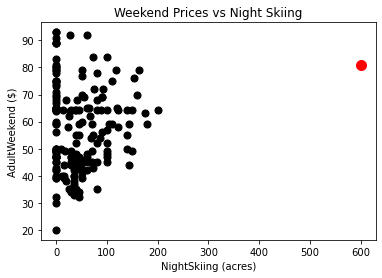

In [18]:
plt.scatter(df['NightSkiing_ac'], df['AdultWeekend'], c='black',s=50)
plt.scatter(bigm['NightSkiing_ac'], bigm['AdultWeekend'], c='red', s=100)
plt.xlabel('NightSkiing (acres)')
plt.ylabel('AdultWeekend ($)')
plt.title('Weekend Prices vs Night Skiing')
plt.savefig('figures/fig3.png',bbox_inches='tight')

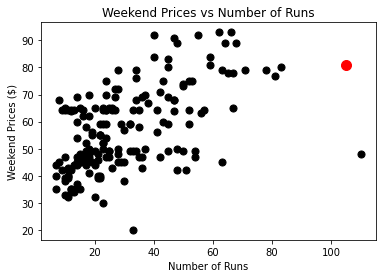

In [19]:
plt.scatter(df['Runs'], df['AdultWeekend'], c='black',s=50)
plt.scatter(bigm['Runs'], bigm['AdultWeekend'], c='red', s=100)
plt.xlabel('Number of Runs')
plt.ylabel('Weekend Prices ($)')
plt.title('Weekend Prices vs Number of Runs')
plt.savefig('figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [20]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [22]:
coef = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Values']).sort_values(by='Values',ascending=False).transpose()
values = {'Values':{'Explained Variance Score':0.5325426531233336, 'Mean Absolute Error':7.373969726141045, "Model Intercept":56.35202406990897 }}
valuespd = pd.DataFrame(values).transpose()
mergedDf = coef.merge(valuespd, left_index=True, right_index=True)

In [23]:
mergedDf

,AdultWeekday,clusters,summit_elev,vertical_drop,TerrainParks,quad,daysOpenLastYear,projectedDaysOpen,SkiableTerrain_ac,surface,...,total_chairs,yearsOpen,NightSkiing_ac,Runs,fastEight,fastSixes,trams,Explained Variance Score,Mean Absolute Error,Model Intercept
Values,10.150126,3.521296,2.988854,2.687827,2.558779,2.053486,1.820064,1.692985,1.519416,1.312435,...,0.47768,0.391357,0.211499,0.056249,1.554312e-15,4.440892e-16,0.0,0.532543,7.37397,56.352024


In [24]:
file2 = os.path.join(path,'data','coefficients.csv')

In [25]:
mergedDf.to_csv(file2,header=True,index=True)